<center><img src="https://www.ebodhi.in/wp-content/uploads/2018/04/Techopedia.jpg"></center>

# Data Vizualisation, preprocessing and Feature engineering tutorial 
<br>
<b>Important</b> : <br>
The purpose of this tutorial is to make you understand the main ideas behind feature engineering and how can we generate new features from our dataset.<br> 
<pre><b>Table of contents :
    1. Read data
    2. Missing values
    3. Feature engineering
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read data

In [2]:
wine = pd.read_csv('./wine.csv')
wine.shape

(150930, 8)

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 8 columns):
country        150925 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 9.2+ MB


In [4]:
wine.head()

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


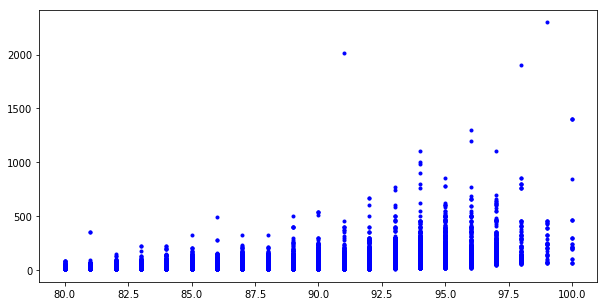

In [5]:
plt.figure(figsize=(10,5))
plt.plot(wine.points,wine.price,'b.');

In [6]:
wine[['price','points']].corr()

,price,points
price,1.000000,0.459863
points,0.459863,1.000000


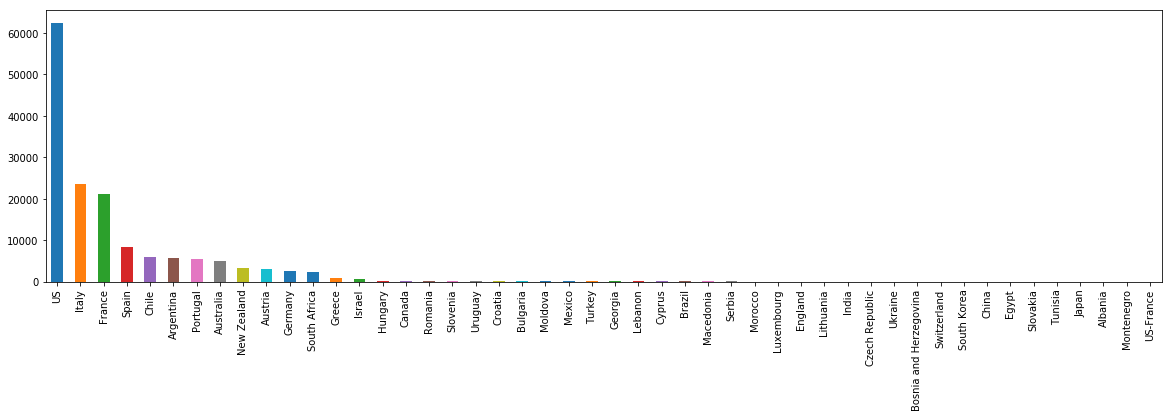

In [7]:
plt.figure(figsize=(20,5))
wine.country.value_counts().plot('bar')
plt.show()

## 2. Missing values

In [8]:
(wine.isnull().sum()*100)/wine.shape[0]

country         0.003313
designation    30.302127
points          0.000000
price           9.073743
province        0.003313
region_1       16.603724
variety         0.000000
winery          0.000000
dtype: float64

In [9]:
#country and province's missing values are less then 0.00%, we can just delete the rows.
wine = wine[~(wine.country.isnull()|wine.province.isnull())]

In [10]:
#price missing values
wine.price.replace(np.nan,wine.price.median(),inplace=True)

In [11]:
#this will take a few seconds
#assign mode of region by province to get a more accurate filling for null values
for province in wine.province.unique() : 
    wine.loc[wine.region_1.isnull(),'region_1'] = wine[wine.province == province].region_1.mode()[0]

In [12]:
#this will take a few seconds
#assign mode of designation by variety to get a more accurate filling for null values
for variety in wine.variety.unique():
    wine.loc[wine.designation.isnull(),'designation'] = wine[wine.variety == variety].designation.mode()[0]

In [13]:
(wine.isnull().sum()*100)/wine.shape[0]

country        0.0
designation    0.0
points         0.0
price          0.0
province       0.0
region_1       0.0
variety        0.0
winery         0.0
dtype: float64

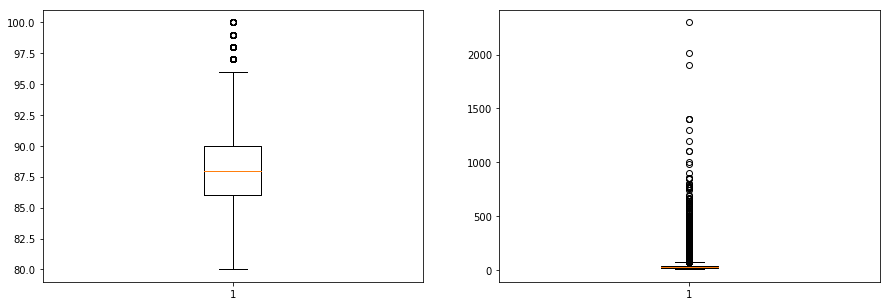

In [14]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].boxplot(wine.points)
ax[1].boxplot(wine.price)
plt.show()

In [15]:
wine.shape

(150925, 8)

## 3. Feature engineering

In this part, we are going to focus on points and price, to generate features related to wine and winery.

### Price category :

If you type wine price category on google, you will find 8 price categories of wine.
I am going to introduce these categories to our dataset.<br>
Wine categories : <br>   
   * Value Wine. Cost: $4–$10
   * Popular “Premium” Wine. Cost: $10–$15 
   * Premium Wine. Cost: $15–$20
   * Super-Premium Wine. Cost: $20–$30
   * Ultra Premium Wine. Cost: $30–$50
   * Luxury Wine. Cost: $50–$100
   * Super Luxury Wine. Cost: $100–$200
   * Icon Wine. Cost:$200+

In [16]:
def price_category(price):
    if price>200 :
        return 'Icon Wine'
    elif price>100 and price <= 200 :
        return 'Super Luxury Wine'
    elif price>50 and price <= 100 :
        return 'Luxury Wine'
    elif price>30 and price <= 50 :
        return 'Ultra Premium Wine'
    elif price>20 and price <= 30 :
        return 'Super-Premium Wine'
    elif price>15 and price <= 20 :
        return 'Premium Wine'
    elif price>10 and price <= 15 :  
        return 'Popular Premium Wine'
    else :
        return 'Value Wine'
    
#this is an ordinal categorical feature
wine['price_category'] = wine.price.apply(lambda x : price_category(x))

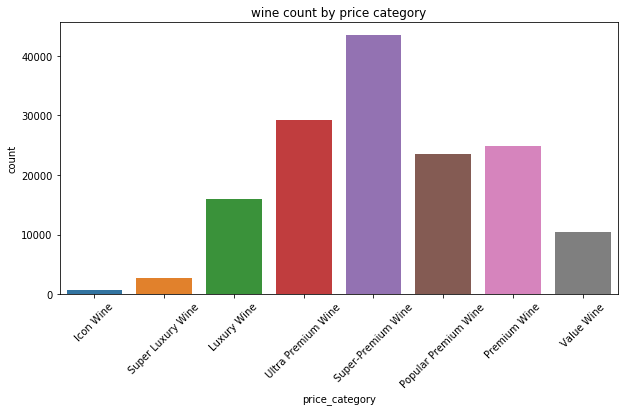

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=wine,x='price_category',orient=45)
plt.xticks(rotation=45)
plt.title('wine count by price category')
plt.show()

In [18]:
wine.head()

,country,designation,points,price,province,region_1,variety,winery,price_category
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,Icon Wine
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,Super Luxury Wine
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,Luxury Wine
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,Luxury Wine
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,Luxury Wine


### value for money :

Value for money indicates if there is a good tradeoff between points(quality) and price.<br>
If we divide points by price we can introduce the value for money feature to our dataset.<br>
If the price is to high compared to points(quality) we will get a value less than 1, if the price is as much as points we will get a value close to one and if the price is lower than points we will get a value higher than 1.<br>
the only problem that remains is that price and points have different scales.<br>
That's why we need to scale the features points and price before we do any operation.<br>
Is that all ? no! <br>
Even if we scale the price and points between 0 and 1, remember that wine has price categories, if we scale all categories at once, then all sheep wine price categories will get a price scaled value close to 0 and all expensive wine categories will get a price scaled value close to 1.<br>
As a result, most of the expensive wine will have a low "value for money" which means high price for low quality and most of the sheep wine will get a high "value for money" value which means low price for high quality. that's not right!<br>
To be fair, we need to scale the price by category.

In [19]:
from sklearn.preprocessing import MinMaxScaler

#scale points
scaler_points = MinMaxScaler()

wine['scaled_points'] = 0
wine.scaled_points = scaler_points.fit_transform(wine[['points']])

In [20]:
#scale price
scaler_price  = MinMaxScaler()
wine['scaled_price'] = 0

#scale price by category
for category in wine.price_category.unique() : 
    wine.loc[wine.price_category==category,'scaled_price'] = scaler_price.fit_transform(wine[wine.price_category==category][['price']])

In [21]:
#generate the feature value_for_money (divide the scaled_points by the scaled_price) 
wine['value_for_money'] = wine.scaled_points/wine.scaled_price

In the next cell, we will correct some values in value_for_money feature. <br> 
When we divided "scaled_points" by "scaled_price", there are a few cases where both values are zeros and other cases where "scaled_points" are equal to one and "scaled_price" are equal to zero. <br>
These few cases will generate values like nan and inf :<br> 
 * 0/0 = nan <br>
 * 1/0 = inf <br>
In order to solve this issue, we will replace nan (0/0) by 1 because 0/0 in our new 0 to 1 scale simply means that the cheapest wine in a particular "price_category" has the least quality or points, thus we will replace it with 1.<br>
With regard to the second case (1/0= inf), we will replace inf by the maximum value in value_for_money feature, that's because 1/0 means that the cheapest wine in a particular price_category has the highest quality or points.

In [22]:
#replace inf
maximum = wine.value_for_money[wine.value_for_money!=np.inf].max()
wine.value_for_money.replace(np.inf,maximum,inplace=True)
#replace nan
wine.value_for_money.replace(np.nan,1,inplace=True)

In [23]:
wine.head()

,country,designation,points,price,province,region_1,variety,winery,price_category,scaled_points,scaled_price,value_for_money
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,Icon Wine,0.80,0.015729,50.860606
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,Super Luxury Wine,0.80,0.090909,8.800000
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,Luxury Wine,0.80,0.795918,1.005128
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,Luxury Wine,0.80,0.285714,2.800000
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,Luxury Wine,0.75,0.306122,2.450000


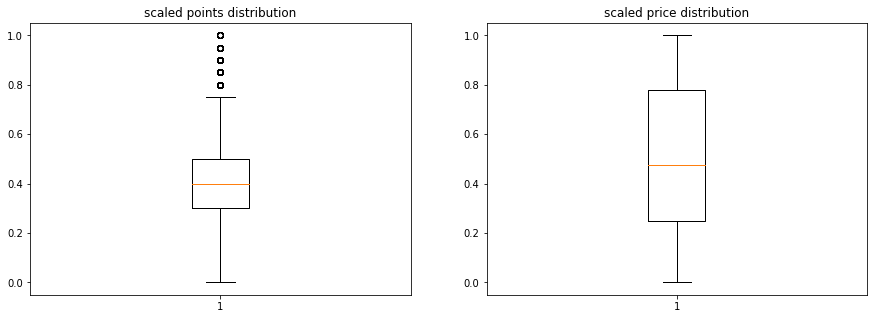

In [24]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].boxplot(wine.scaled_points)
ax[0].set_title('scaled points distribution')
ax[1].boxplot(wine.scaled_price)
ax[1].set_title('scaled price distribution')
plt.show()

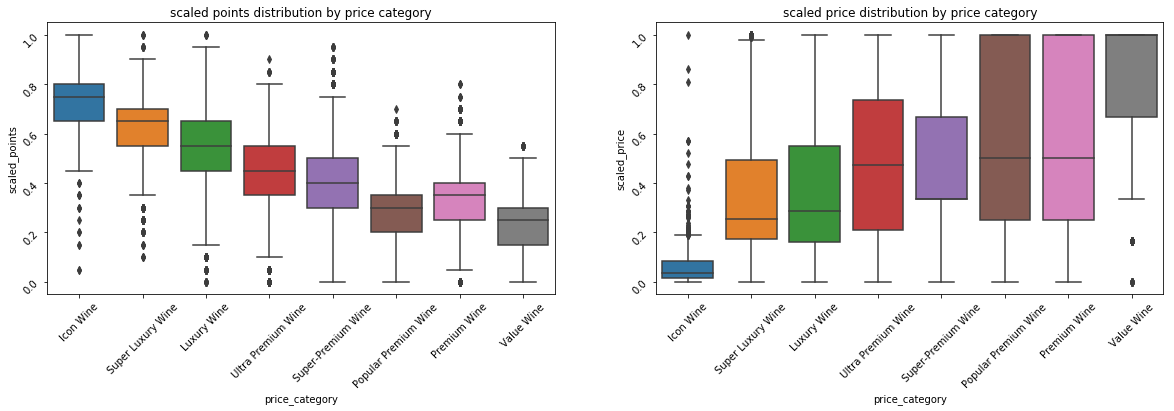

In [25]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(data=wine,y='scaled_points',x='price_category',ax=ax[0])
ax[0].tick_params(labelrotation=45)
ax[0].set_title('scaled points distribution by price category')

sns.boxplot(data=wine,y='scaled_price',x='price_category',ax=ax[1])
ax[1].tick_params(labelrotation=45)
ax[1].set_title('scaled price distribution by price category')
plt.show()

In the next cell, we will generate three binary features from value_for_money feature.</br>
The first one is <b>good_value_for_money</b>, it will indicate whether or not the value_for_money is in a good range that guarantees a good tradeoff between quality and price.<br>
The second one is <b>value_2times_money</b>, it will indicate whether or not the quality(points) is at least two time better than the price. <br>
The third one is <b>money_2times_value</b>, it will indicate whether or not the price is at least two times higher than the quality(points).

In [26]:
#wine faetures
wine['good_value_for_money'] = 0
wine['value_2times_money']   = 0
wine['money_2times_value']   = 0

wine.loc[(wine.value_for_money>0.5)&(wine.value_for_money<2),'good_value_for_money'] = 1
wine.loc[wine.value_for_money>2,'value_2times_money'] = 1
wine.loc[wine.value_for_money<0.5,'money_2times_value'] = 1

In [27]:
wine.head()

,country,designation,points,price,province,region_1,variety,winery,price_category,scaled_points,scaled_price,value_for_money,good_value_for_money,value_2times_money,money_2times_value
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,Icon Wine,0.80,0.015729,50.860606,0,1,0
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,Super Luxury Wine,0.80,0.090909,8.800000,0,1,0
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,Luxury Wine,0.80,0.795918,1.005128,1,0,0
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,Luxury Wine,0.80,0.285714,2.800000,0,1,0
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,Luxury Wine,0.75,0.306122,2.450000,0,1,0


### Winery features :

In the next cell, we will group each of the three previous features by winery and calculate their mean value.<br>
These new features will indicate the percentage of each one of the previous three features for each winery.<br>
For example, if a certain winery has these values on each of these features : <br>
* Avg_good_value_for_money = 0.5<br>
* Avg_value_2times_money = 0.4<br>
* Avg_money_2times_value = 0.1<br>
This means that the winery produces 50% of wine with a good quality/price tradeoff, 40% of it's wine's quality is at least 2 times better than the price and only 10% of its wine has a high price compared to the quality.

In [28]:
#winery features
wine['Avg_good_value_for_money'] = wine.winery.map(wine[['good_value_for_money','winery']].groupby('winery').mean()['good_value_for_money'])
wine['Avg_value_2times_money']   = wine.winery.map(wine[['value_2times_money','winery']].groupby('winery').mean()['value_2times_money'])
wine['Avg_money_2times_value']   = wine.winery.map(wine[['money_2times_value','winery']].groupby('winery').mean()['money_2times_value'])

In [29]:
#we no longer need the scaled_price and scaled_points features.
wine.drop(['scaled_price','scaled_points'],axis=1,inplace=True)

In the next cell I will create a score winery feature, in which I assign a score for each winery based on the three previous features.<br> 
The score is simply a linear formula in which I will penalize the feature Avg_money_2times_value with a 0.25 coefficient and give 0.5 coefficient to Avg_good_value_for_money feature and 1 coefficient to Avg_value_2times_money feature. <br>
I will create the score in a way that it penalizes wineries that produces low wine quality with high price and gives an advantage to the wineries that provides a good price/quality tradeoff or produces a good quality wine with a low price.<br>

* X1=Avg_money_2times_value<br>
* X2=Avg_good_value_for_money<br>
* X3=Avg_value_2times_money<br>

Winery_score = X1*0.25 + X2*0.5 + X3*1

In [30]:
wine['winery_score'] = wine['Avg_money_2times_value']*0.25+wine['Avg_good_value_for_money']*0.5+wine['Avg_value_2times_money']

C:\Users\Aziz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


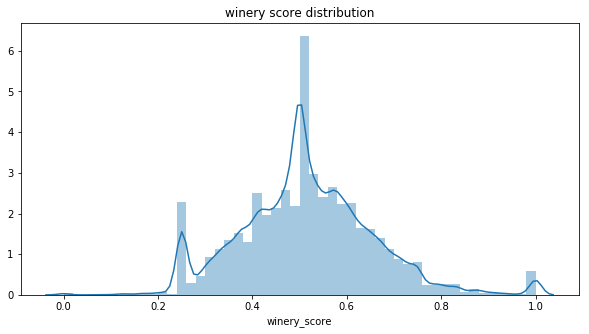

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(wine.winery_score)
plt.title('winery score distribution')
plt.show()

### Final dataset 

In [32]:
wine.head()

,country,designation,points,price,province,region_1,variety,winery,price_category,value_for_money,good_value_for_money,value_2times_money,money_2times_value,Avg_good_value_for_money,Avg_value_2times_money,Avg_money_2times_value,winery_score
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,Icon Wine,50.860606,0,1,0,0.000000,1.000000,0.000000,1.000000
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,Super Luxury Wine,8.800000,0,1,0,0.666667,0.333333,0.000000,0.666667
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,Luxury Wine,1.005128,1,0,0,0.600000,0.400000,0.000000,0.700000
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,Luxury Wine,2.800000,0,1,0,0.486486,0.324324,0.094595,0.591216
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,Luxury Wine,2.450000,0,1,0,0.500000,0.500000,0.000000,0.750000


In [33]:
wine.tail()

,country,designation,points,price,province,region_1,variety,winery,price_category,value_for_money,good_value_for_money,value_2times_money,money_2times_value,Avg_good_value_for_money,Avg_value_2times_money,Avg_money_2times_value,winery_score
150925,Italy,Reserve,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio,Premium Wine,0.550,1,0,0,0.474747,0.363636,0.151515,0.638889
150926,France,Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain,Super-Premium Wine,0.825,1,0,0,1.000000,0.000000,0.000000,0.500000
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora,Premium Wine,0.550,1,0,0,0.631579,0.131579,0.236842,0.506579
150928,France,Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne Blend,Gosset,Luxury Wine,24.500,0,1,0,0.818182,0.181818,0.000000,0.590909
150929,Italy,Reserve,90,15.0,Northeastern Italy,Alto Adige,Pinot Grigio,Alois Lageder,Popular Premium Wine,0.500,0,0,0,0.567568,0.135135,0.243243,0.479730


Feature engineering is a necessary skill in data science and IA fields, as it can introduce new information to your dataset and gives you more insights to develop a better machine learning model<br>
For example, we can now order the wineries by their scores, we can also show what regions, province or countries have the best wineries etc.<br>
We couldn't reach these kind of insights without feature engineering.<br>
Remember that we have generated 8 features (4 features related to the wine and 4 features related to the winery) only from price and points features, we can still generate more features maybe if we use other combinations or ideas.

In [34]:
wine.sort_values('winery_score',ascending=False).head()

,country,designation,points,price,province,region_1,variety,winery,price_category,value_for_money,good_value_for_money,value_2times_money,money_2times_value,Avg_good_value_for_money,Avg_value_2times_money,Avg_money_2times_value,winery_score
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,Icon Wine,50.860606,0,1,0,0.0,1.0,0.0,1.0
2634,France,Le Grand Bouqueteau,87,16.0,Loire Valley,Chinon,Cabernet Franc,Château du Coudray Montpensier,Premium Wine,1468.600000,0,1,0,0.0,1.0,0.0,1.0
64365,Greece,Vin de Crete,84,11.0,Crete,Napa Valley,Red Blend,Creta Olympias,Popular Premium Wine,1468.600000,0,1,0,0.0,1.0,0.0,1.0
64367,US,Reserve,84,16.0,California,Santa Barbara County,Syrah,Los Alisos,Premium Wine,1468.600000,0,1,0,0.0,1.0,0.0,1.0
64371,Australia,Flying Piano Hand Select,84,11.0,Australia Other,South Eastern Australia,Shiraz,Ozwell Vintners,Popular Premium Wine,1468.600000,0,1,0,0.0,1.0,0.0,1.0


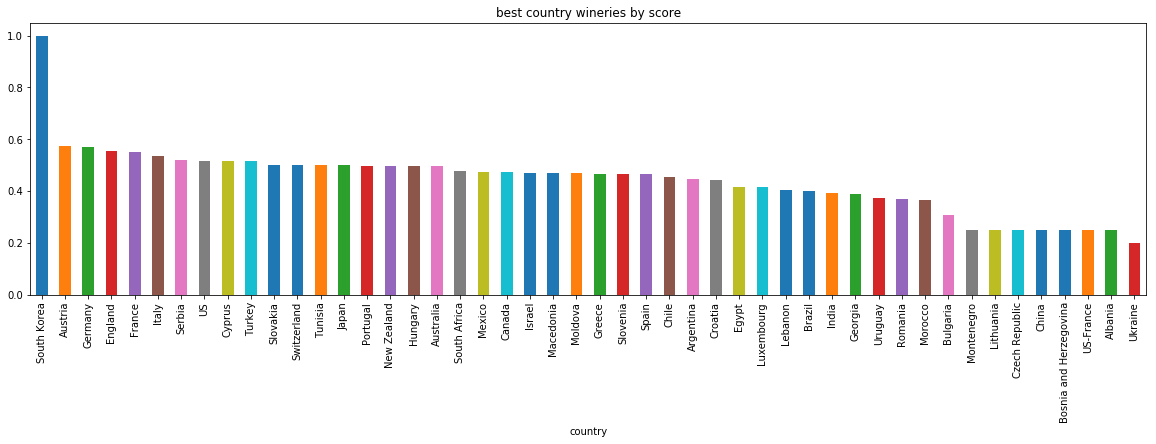

In [35]:
plt.figure(figsize=(20,5))
wine[['country','winery_score']].groupby('country').mean().sort_values('winery_score',ascending=False).winery_score.plot('bar')
plt.title('best country wineries by score')
plt.show()

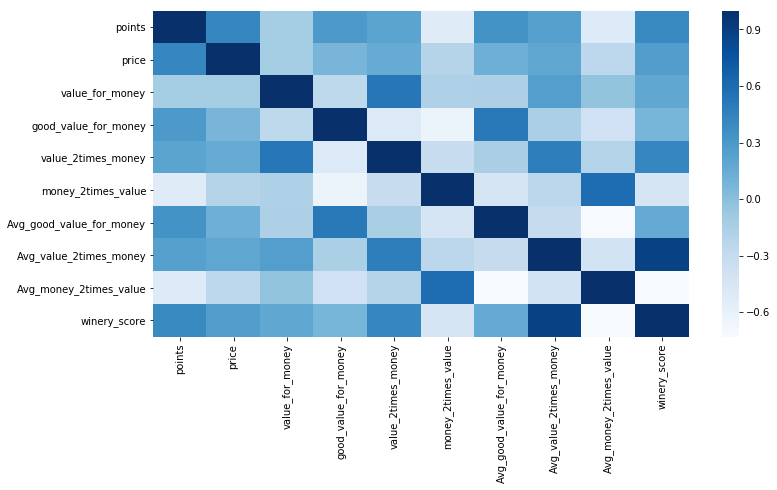

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(wine.corr(),cmap='Blues')
plt.show()

### Encode data with label encoder

In [37]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for feature in wine.columns:
    if wine[feature].dtype == object:
        wine[feature] = encoder.fit_transform(wine[feature])

In [38]:
wine.head()

,country,designation,points,price,province,region_1,variety,winery,price_category,value_for_money,good_value_for_money,value_2times_money,money_2times_value,Avg_good_value_for_money,Avg_value_2times_money,Avg_money_2times_value,winery_score
0,44,17270,96,235.0,51,738,70,7286,0,50.860606,0,1,0,0.000000,1.000000,0.000000,1.000000
1,40,4397,96,110.0,274,1070,553,1231,4,8.800000,0,1,0,0.666667,0.333333,0.000000,0.666667
2,44,25379,96,90.0,51,528,468,9032,1,1.005128,1,0,0,0.600000,0.400000,0.000000,0.700000
3,44,22305,96,65.0,282,1222,402,11001,1,2.800000,0,1,0,0.486486,0.324324,0.094595,0.591216
4,15,14259,95,66.0,313,66,422,5409,1,2.450000,0,1,0,0.500000,0.500000,0.000000,0.750000


After we encoded our data, we can move on to build our machine learning model. <br>
That's it! Hope you enjoyed the tutorial.